# Time-series Data

In [1]:
# import pandas, numpy and datetime
import numpy as np
import pandas as pd

# needed for representing dates and times
import datetime 
from datetime import datetime

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# matplotlib and inline graphics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datetime(2014, 12, 15)

datetime.datetime(2014, 12, 15, 0, 0)

In [3]:
datetime(2014, 12, 15, 17, 30) # datetime(Y, M, D, H, m)

datetime.datetime(2014, 12, 15, 17, 30)

In [4]:
datetime.now()

datetime.datetime(2016, 3, 11, 6, 51, 12, 327646)

In [5]:
# just date, no time
datetime.date(datetime(2014, 12, 15))

datetime.date(2014, 12, 15)

In [6]:
datetime.now().date()

datetime.date(2016, 3, 11)

In [7]:
datetime.time(datetime(2014, 12, 15, 17, 30))

datetime.time(17, 30)

In [8]:
datetime.now().time()

datetime.time(6, 51, 12, 346039)

## Timestamp objects
pandas.tslib.Timestamp

In [9]:
pd.Timestamp('2014-12-15')

Timestamp('2014-12-15 00:00:00')

In [10]:
pd.Timestamp('2014-12-15 17:30')

Timestamp('2014-12-15 17:30:00')

In [11]:
pd.Timestamp('17:30')

Timestamp('2016-03-11 17:30:00')

In [12]:
pd.Timestamp("now")

Timestamp('2016-03-11 06:51:12.365028')

In [13]:
today = datetime(2014, 11, 30)
tomorrow = today + pd.Timedelta(days=1)
tomorrow

datetime.datetime(2014, 12, 1, 0, 0)

In [14]:
date1 = datetime(2014, 12, 2)
date2 = datetime(2014, 11, 28)
date1 - date2

datetime.timedelta(4)

In [15]:
np.random.seed(123456)
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.469112
2014-08-02   -0.282863
dtype: float64

In [16]:
type(ts.index)

pandas.tseries.index.DatetimeIndex

In [17]:
type(ts.index[0])

pandas.tslib.Timestamp

In [18]:
np.random.seed(123456)
dates = ['2014-08-01', '2014-08-02']
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.469112
2014-08-02   -0.282863
dtype: float64

In [19]:
dti = pd.to_datetime(['Aug 1, 2014',
                      '2014-08-02',
                      '2014.8.3',
                      None])
for l in dti: print(l)

2014-08-01 00:00:00
2014-08-02 00:00:00
2014-08-03 00:00:00
NaT


In [20]:
# pd.to_datetime(['Aug 1, 2014', 'foo'])
pd.to_datetime(['Aug 1, 2014', "foo"],  errors='coerce')


DatetimeIndex(['2014-08-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [21]:
np.random.seed(123456)
periods = pd.date_range('8/1/2014', periods=10)
date_series = pd.Series(np.random.randn(10), index=periods)
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [22]:
subset = date_series[3:7]
subset

2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [23]:
s2 = pd.Series([10, 100, 1000, 10000], subset.index)
s2

2014-08-04       10
2014-08-05      100
2014-08-06     1000
2014-08-07    10000
Freq: D, dtype: int64

In [24]:
date_series + s2

2014-08-01             NaN
2014-08-02             NaN
2014-08-03             NaN
2014-08-04        8.864368
2014-08-05      101.212112
2014-08-06      999.826785
2014-08-07    10000.119209
2014-08-08             NaN
2014-08-09             NaN
2014-08-10             NaN
Freq: D, dtype: float64

In [25]:
date_series['2014-08-05']

1.2121120250208506

In [26]:
date_series['2014-08-05': '2014-08-07']

2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [27]:
s3 = pd.Series(0, pd.date_range('2013-01-01', '2014-12-31'))
s3['2013']

2013-01-01    0
2013-01-02    0
2013-01-03    0
2013-01-04    0
2013-01-05    0
             ..
2013-12-27    0
2013-12-28    0
2013-12-29    0
2013-12-30    0
2013-12-31    0
Freq: D, dtype: int64

In [28]:
s3['2014-05']

2014-05-01    0
2014-05-02    0
2014-05-03    0
2014-05-04    0
2014-05-05    0
             ..
2014-05-27    0
2014-05-28    0
2014-05-29    0
2014-05-30    0
2014-05-31    0
Freq: D, dtype: int64

In [29]:
s3['2014-08':'2014-09']

2014-08-01    0
2014-08-02    0
2014-08-03    0
2014-08-04    0
2014-08-05    0
             ..
2014-09-26    0
2014-09-27    0
2014-09-28    0
2014-09-29    0
2014-09-30    0
Freq: D, dtype: int64

In [30]:
np.random.seed(123456)
bymin = pd.Series(np.random.randn(24*60*90),
                  pd.date_range('2014-08-01',
                                '2014-10-29 23:59',
                                freq="T")) # default=D
bymin
# B: Business day freq
# C: Custom business day freq
# D: Calendar day freq
# W: Weekly freq
# M: Month end freq
# BM: Business month end freq
# CBM: Custom business month end freq
# MS: Month start freq
# BMS: Business month start freq
# CBMS: Custom business month start freq
# Q: Quarter end freq
# BQ: Business quarter freq
# QS: Quarter start freq
# BQS: Business quarter start freq
# A: Year end freq
# BA: Business year-end freq
# AS: Year start freq
# BAS: Business year start freq
# H: Hourly freq
# T: Minute-by-minute freq
# S: Second-by-second freq
# L: Milliseconds
# U: Microseconds

2014-08-01 00:00:00    0.469112
2014-08-01 00:01:00   -0.282863
2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
                         ...   
2014-10-29 23:55:00   -0.563029
2014-10-29 23:56:00    1.180497
2014-10-29 23:57:00    1.850604
2014-10-29 23:58:00   -1.589660
2014-10-29 23:59:00    0.266429
Freq: T, dtype: float64

In [31]:
bymin['2014-08-01 00:02': '2014-08-01 00:10']

2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
2014-08-01 00:05:00   -0.173215
2014-08-01 00:06:00    0.119209
2014-08-01 00:07:00   -1.044236
2014-08-01 00:08:00   -0.861849
2014-08-01 00:09:00   -2.104569
2014-08-01 00:10:00   -0.494929
Freq: T, dtype: float64

In [32]:
days = pd.date_range('2014-08-29', '2014-09-05', freq='B')
for d in days: print (d)

2014-08-29 00:00:00
2014-09-01 00:00:00
2014-09-02 00:00:00
2014-09-03 00:00:00
2014-09-04 00:00:00
2014-09-05 00:00:00


In [33]:
pd.date_range('2014-08-01 12:10:01', freq='S', periods=10)

DatetimeIndex(['2014-08-01 12:10:01', '2014-08-01 12:10:02',
               '2014-08-01 12:10:03', '2014-08-01 12:10:04',
               '2014-08-01 12:10:05', '2014-08-01 12:10:06',
               '2014-08-01 12:10:07', '2014-08-01 12:10:08',
               '2014-08-01 12:10:09', '2014-08-01 12:10:10'],
              dtype='datetime64[ns]', freq='S')

In [34]:
dti = pd.date_range('2014-08-29', '2014-09-05', freq='B')
dti.values

array(['2014-08-28T20:00:00.000000000-0400',
       '2014-08-31T20:00:00.000000000-0400',
       '2014-09-01T20:00:00.000000000-0400',
       '2014-09-02T20:00:00.000000000-0400',
       '2014-09-03T20:00:00.000000000-0400',
       '2014-09-04T20:00:00.000000000-0400'], dtype='datetime64[ns]')

In [35]:
dti.freq

<BusinessDay>

In [36]:
d = datetime(2014, 8, 29)
do = pd.DateOffset(days = 1)
d + do

Timestamp('2014-08-30 00:00:00')

In [37]:
from pandas.tseries.offsets import *
d + BusinessDay()

Timestamp('2014-09-01 00:00:00')

In [38]:
d + 2 * BusinessDay()

Timestamp('2014-09-02 00:00:00')

In [39]:
d + BMonthEnd()

Timestamp('2014-09-30 00:00:00')

In [40]:
BMonthEnd().rollforward(datetime(2014, 9, 15))

Timestamp('2014-09-30 00:00:00')

In [41]:
d - Week(weekday = 1) # ?

Timestamp('2014-08-26 00:00:00')

In [42]:
wednesdays = pd.date_range('2014-06-01', 
                           '2014-08-31', freq="W-WED")
wednesdays.values

array(['2014-06-03T20:00:00.000000000-0400',
       '2014-06-10T20:00:00.000000000-0400',
       '2014-06-17T20:00:00.000000000-0400',
       '2014-06-24T20:00:00.000000000-0400',
       '2014-07-01T20:00:00.000000000-0400',
       '2014-07-08T20:00:00.000000000-0400',
       '2014-07-15T20:00:00.000000000-0400',
       '2014-07-22T20:00:00.000000000-0400',
       '2014-07-29T20:00:00.000000000-0400',
       '2014-08-05T20:00:00.000000000-0400',
       '2014-08-12T20:00:00.000000000-0400',
       '2014-08-19T20:00:00.000000000-0400',
       '2014-08-26T20:00:00.000000000-0400'], dtype='datetime64[ns]')

In [43]:
qends = pd.date_range('2014-01-01', '2014-12-31', freq='BQS-JUN')
qends.values

array(['2014-03-02T19:00:00.000000000-0500',
       '2014-06-01T20:00:00.000000000-0400',
       '2014-08-31T20:00:00.000000000-0400',
       '2014-11-30T19:00:00.000000000-0500'], dtype='datetime64[ns]')

In [44]:
aug2014 = pd.Period('2014-08', freq='M')
aug2014

Period('2014-08', 'M')

In [45]:
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

In [46]:
mp2013 = pd.period_range('1/1/2013', '12/31/2013', freq='M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='int64', freq='M')

In [47]:
for p in mp2013:
    print("{0} {1}".format(p.start_time, p.end_time))

2013-01-01 00:00:00 2013-01-31 23:59:59.999999999
2013-02-01 00:00:00 2013-02-28 23:59:59.999999999
2013-03-01 00:00:00 2013-03-31 23:59:59.999999999
2013-04-01 00:00:00 2013-04-30 23:59:59.999999999
2013-05-01 00:00:00 2013-05-31 23:59:59.999999999
2013-06-01 00:00:00 2013-06-30 23:59:59.999999999
2013-07-01 00:00:00 2013-07-31 23:59:59.999999999
2013-08-01 00:00:00 2013-08-31 23:59:59.999999999
2013-09-01 00:00:00 2013-09-30 23:59:59.999999999
2013-10-01 00:00:00 2013-10-31 23:59:59.999999999
2013-11-01 00:00:00 2013-11-30 23:59:59.999999999
2013-12-01 00:00:00 2013-12-31 23:59:59.999999999


In [48]:
np.random.seed(123456)
ps = pd.Series(np.random.randn(12), mp2013)
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2013-08   -1.044236
2013-09   -0.861849
2013-10   -2.104569
2013-11   -0.494929
2013-12    1.071804
Freq: M, dtype: float64

In [49]:
np.random.seed(123456)
ps = pd.Series(np.random.randn(24),
               pd.period_range('1/1/2013', '12/31/2014', freq='M'))
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, dtype: float64

In [50]:
ps['2014-06']

0.567020349793672

In [51]:
ps['2014']

2014-01    0.721555
2014-02   -0.706771
2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, dtype: float64

In [52]:
ps['2014-03':'2014-06']

2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
Freq: M, dtype: float64

In [53]:
from pandas.tseries.holiday import *
cal = USFederalHolidayCalendar()
for d in cal.holidays(start='2014-01-01', end='2014-12-31'):
    print(d)

2014-01-01 00:00:00
2014-01-20 00:00:00
2014-02-17 00:00:00
2014-05-26 00:00:00
2014-07-04 00:00:00
2014-09-01 00:00:00
2014-10-13 00:00:00
2014-11-11 00:00:00
2014-11-27 00:00:00
2014-12-25 00:00:00


In [54]:
cbd = CustomBusinessDay(holidays=cal.holidays())
datetime(2014, 8, 29) + cbd

Timestamp('2014-09-02 00:00:00')

## Time zones

In [55]:
now = pd.Timestamp('now')
now, now.tz is None

(Timestamp('2016-03-11 06:51:12.848959'), True)

In [56]:
rng = pd.date_range('3/6/2012 00:00', periods=15, freq='D')
rng.tz is None, rng[0].tz is None                

(True, True)

In [57]:
from pytz import common_timezones
common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [58]:
now = Timestamp("now")
local_now = now.tz_localize('UTC')
now, local_now

(Timestamp('2016-03-11 06:51:12.906496'),
 Timestamp('2016-03-11 06:51:12.906496+0000', tz='UTC'))

In [59]:
tstamp = Timestamp('2014-08-01 12:00:00', tz='US/Mountain')
tstamp

Timestamp('2014-08-01 12:00:00-0600', tz='US/Mountain')

In [60]:
rng = pd.date_range('3/6/2012 00:00:00', 
                    periods=10, freq="D", tz='US/Mountain')
rng.tz, rng[0].tz

(<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>,
 <DstTzInfo 'US/Mountain' MST-1 day, 17:00:00 STD>)

In [61]:
import pytz
mountain_tz = pytz.timezone('US/Mountain')
eastern_tz = pytz.timezone("US/Eastern")

mountain_tz.localize(now), eastern_tz.localize(now)


(Timestamp('2016-03-11 06:51:12.906496-0700', tz='US/Mountain'),
 Timestamp('2016-03-11 06:51:12.906496-0500', tz='US/Eastern'))

In [62]:
s_mountain = Series(np.arange(0, 5),
                    index=pd.date_range('2014-08-01',
                                        periods=5, freq="H",
                                        tz='US/Mountain'))
s_eastern = Series(np.arange(0, 5),
                   index=pd.date_range('2014-08-01',
                                        periods=5, freq="H",
                                        tz='US/Eastern'))
s_mountain

2014-08-01 00:00:00-06:00    0
2014-08-01 01:00:00-06:00    1
2014-08-01 02:00:00-06:00    2
2014-08-01 03:00:00-06:00    3
2014-08-01 04:00:00-06:00    4
Freq: H, dtype: int64

In [63]:
s_eastern

2014-08-01 00:00:00-04:00    0
2014-08-01 01:00:00-04:00    1
2014-08-01 02:00:00-04:00    2
2014-08-01 03:00:00-04:00    3
2014-08-01 04:00:00-04:00    4
Freq: H, dtype: int64

In [64]:
s_eastern + s_mountain

2014-08-01 04:00:00+00:00   NaN
2014-08-01 05:00:00+00:00   NaN
2014-08-01 06:00:00+00:00     2
2014-08-01 07:00:00+00:00     4
2014-08-01 08:00:00+00:00     6
2014-08-01 09:00:00+00:00   NaN
2014-08-01 10:00:00+00:00   NaN
Freq: H, dtype: float64

In [65]:
s_pacific = s_eastern.tz_convert("US/Pacific")
s_pacific

2014-07-31 21:00:00-07:00    0
2014-07-31 22:00:00-07:00    1
2014-07-31 23:00:00-07:00    2
2014-08-01 00:00:00-07:00    3
2014-08-01 01:00:00-07:00    4
Freq: H, dtype: int64

In [66]:
s_mountain + s_pacific 

2014-08-01 04:00:00+00:00   NaN
2014-08-01 05:00:00+00:00   NaN
2014-08-01 06:00:00+00:00     2
2014-08-01 07:00:00+00:00     4
2014-08-01 08:00:00+00:00     6
2014-08-01 09:00:00+00:00   NaN
2014-08-01 10:00:00+00:00   NaN
Freq: H, dtype: float64

## Shifting

In [67]:
np.random.seed(123456)
ts = Series([1, 2, 2.5, 1.5, 0.5], 
          pd.date_range('2014-08-01', periods=5))
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

In [68]:
ts.shift(1)

2014-08-01    NaN
2014-08-02    1.0
2014-08-03    2.0
2014-08-04    2.5
2014-08-05    1.5
Freq: D, dtype: float64

In [69]:
ts.shift(-2)

2014-08-01    2.5
2014-08-02    1.5
2014-08-03    0.5
2014-08-04    NaN
2014-08-05    NaN
Freq: D, dtype: float64

In [70]:
ts / ts.shift(1)

2014-08-01         NaN
2014-08-02    2.000000
2014-08-03    1.250000
2014-08-04    0.600000
2014-08-05    0.333333
Freq: D, dtype: float64

In [71]:
ts.shift(1, freq="B")

2014-08-04    1.0
2014-08-04    2.0
2014-08-04    2.5
2014-08-05    1.5
2014-08-06    0.5
dtype: float64

In [72]:
ts.tshift(5, freq="H")

2014-08-01 05:00:00    1.0
2014-08-02 05:00:00    2.0
2014-08-03 05:00:00    2.5
2014-08-04 05:00:00    1.5
2014-08-05 05:00:00    0.5
Freq: D, dtype: float64

In [73]:
ts.shift(1, DateOffset(minutes=0.5))

2014-08-01 00:00:30    1.0
2014-08-02 00:00:30    2.0
2014-08-03 00:00:30    2.5
2014-08-04 00:00:30    1.5
2014-08-05 00:00:30    0.5
Freq: D, dtype: float64

In [74]:
ts.tshift(-1, freq='H')

2014-07-31 23:00:00    1.0
2014-08-01 23:00:00    2.0
2014-08-02 23:00:00    2.5
2014-08-03 23:00:00    1.5
2014-08-04 23:00:00    0.5
Freq: D, dtype: float64

In [75]:
periods = 31 * 24
hourly = Series(np.arange(0, periods), 
                pd.date_range('08-01-2014', freq="2H",
                              periods = periods))
hourly

2014-08-01 00:00:00      0
2014-08-01 02:00:00      1
2014-08-01 04:00:00      2
2014-08-01 06:00:00      3
2014-08-01 08:00:00      4
                      ... 
2014-10-01 14:00:00    739
2014-10-01 16:00:00    740
2014-10-01 18:00:00    741
2014-10-01 20:00:00    742
2014-10-01 22:00:00    743
Freq: 2H, dtype: int64

In [76]:
daily = hourly.asfreq("D")
daily

2014-08-01      0
2014-08-02     12
2014-08-03     24
2014-08-04     36
2014-08-05     48
             ... 
2014-09-27    684
2014-09-28    696
2014-09-29    708
2014-09-30    720
2014-10-01    732
Freq: D, dtype: int64

In [77]:
daily.asfreq("H")

2014-08-01 00:00:00      0
2014-08-01 01:00:00    NaN
2014-08-01 02:00:00    NaN
2014-08-01 03:00:00    NaN
2014-08-01 04:00:00    NaN
                      ... 
2014-09-30 20:00:00    NaN
2014-09-30 21:00:00    NaN
2014-09-30 22:00:00    NaN
2014-09-30 23:00:00    NaN
2014-10-01 00:00:00    732
Freq: H, dtype: float64

In [78]:
daily.asfreq("H", method="ffill")

2014-08-01 00:00:00      0
2014-08-01 01:00:00      0
2014-08-01 02:00:00      0
2014-08-01 03:00:00      0
2014-08-01 04:00:00      0
                      ... 
2014-09-30 20:00:00    720
2014-09-30 21:00:00    720
2014-09-30 22:00:00    720
2014-09-30 23:00:00    720
2014-10-01 00:00:00    732
Freq: H, dtype: int64

In [79]:
daily.asfreq("H", method="bfill")

2014-08-01 00:00:00      0
2014-08-01 01:00:00     12
2014-08-01 02:00:00     12
2014-08-01 03:00:00     12
2014-08-01 04:00:00     12
                      ... 
2014-09-30 20:00:00    732
2014-09-30 21:00:00    732
2014-09-30 22:00:00    732
2014-09-30 23:00:00    732
2014-10-01 00:00:00    732
Freq: H, dtype: int64

In [80]:
count = 24 * 60 * 60 * 5
np.random.seed(123456)
values = np.random.randn(count)
ws = pd.Series(values)
walk = ws.cumsum()
walk.index = pd.date_range('2014-08-01', periods=count, freq='S')
walk

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01      0.186249
2014-08-01 00:00:02     -1.322810
2014-08-01 00:00:03     -2.458442
2014-08-01 00:00:04     -1.246330
                          ...    
2014-08-05 23:59:55    456.529763
2014-08-05 23:59:56    456.052131
2014-08-05 23:59:57    455.202981
2014-08-05 23:59:58    454.947362
2014-08-05 23:59:59    456.191430
Freq: S, dtype: float64

In [81]:
walk.resample("1Min")

2014-08-01 00:00:00     -8.718220
2014-08-01 00:01:00    -15.239213
2014-08-01 00:02:00     -9.179315
2014-08-01 00:03:00     -8.338307
2014-08-01 00:04:00     -8.129554
                          ...    
2014-08-05 23:55:00    453.773467
2014-08-05 23:56:00    450.857039
2014-08-05 23:57:00    450.078149
2014-08-05 23:58:00    444.637806
2014-08-05 23:59:00    453.837417
Freq: T, dtype: float64

In [82]:
walk['2014-08-01 00:00'].mean()

-8.718220052832644

In [83]:
walk.resample("1Min", closed='right')

2014-07-31 23:59:00      0.469112
2014-08-01 00:00:00     -8.907477
2014-08-01 00:01:00    -15.280685
2014-08-01 00:02:00     -9.083865
2014-08-01 00:03:00     -8.285550
                          ...    
2014-08-05 23:55:00    453.726168
2014-08-05 23:56:00    450.849039
2014-08-05 23:57:00    450.039159
2014-08-05 23:58:00    444.631719
2014-08-05 23:59:00    453.955377
Freq: T, dtype: float64

In [84]:
bymin = walk.resample("!Min")
bymin.resample('S')

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01           NaN
2014-08-01 00:00:02           NaN
2014-08-01 00:00:03           NaN
2014-08-01 00:00:04           NaN
                          ...    
2014-08-05 23:58:56           NaN
2014-08-05 23:58:57           NaN
2014-08-05 23:58:58           NaN
2014-08-05 23:58:59           NaN
2014-08-05 23:59:00    453.837417
Freq: S, dtype: float64

In [85]:
bymin.resample("S", fill_method="bfill")

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01    -15.239213
2014-08-01 00:00:02    -15.239213
2014-08-01 00:00:03    -15.239213
2014-08-01 00:00:04    -15.239213
                          ...    
2014-08-05 23:58:56    453.837417
2014-08-05 23:58:57    453.837417
2014-08-05 23:58:58    453.837417
2014-08-05 23:58:59    453.837417
2014-08-05 23:59:00    453.837417
Freq: S, dtype: float64

In [86]:
interpolated = bymin.resample("S").interpolate()
interpolated

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01     -8.826903
2014-08-01 00:00:02     -8.935586
2014-08-01 00:00:03     -9.044270
2014-08-01 00:00:04     -9.152953
                          ...    
2014-08-05 23:58:56    453.224110
2014-08-05 23:58:57    453.377437
2014-08-05 23:58:58    453.530764
2014-08-05 23:58:59    453.684090
2014-08-05 23:59:00    453.837417
Freq: S, dtype: float64

In [87]:
ohlc = walk.resample("H", how="ohlc") # open, high, low, close
ohlc

,open,high,low,close
2014-08-01 00:00:00,0.469112,0.469112,-67.873166,-2.922520
2014-08-01 01:00:00,-3.374321,23.793007,-56.585154,-55.101543
2014-08-01 02:00:00,-54.276885,5.232441,-87.809456,1.913276
2014-08-01 03:00:00,0.260576,17.124638,-65.820652,-38.530620
2014-08-01 04:00:00,-38.436581,3.537231,-109.805294,-61.014553
...,...,...,...,...
2014-08-05 19:00:00,437.652077,550.408942,430.549178,494.471788
2014-08-05 20:00:00,496.539759,510.371745,456.365565,476.505765
2014-08-05 21:00:00,476.025498,506.952877,425.472410,498.547578
2014-08-05 22:00:00,497.941355,506.599652,411.119919,443.925832


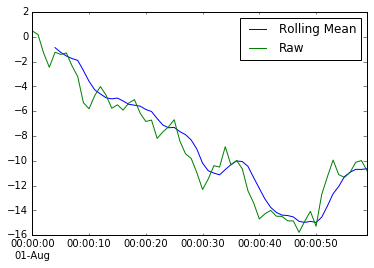

In [88]:
first_minute = walk['2014-08-01 00:00']
pd.rolling_mean(first_minute, 5).plot()
first_minute.plot()
plt.legend(labels=['Rolling Mean', 'Raw'])

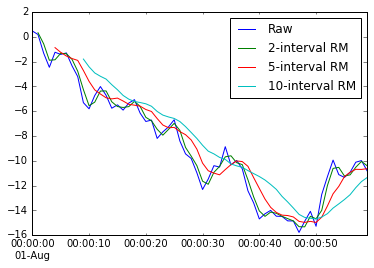

In [89]:
h1w = walk['2014-08-01 00:00']
h1w.plot()
pd.rolling_mean(h1w, 2).plot()
pd.rolling_mean(h1w, 5).plot()
pd.rolling_mean(h1w, 10).plot()
plt.legend(labels=['Raw',
                   '2-interval RM',
                   '5-interval RM',
                   '10-interval RM',
                  ])


In [ ]:
mean_abs_dev = lambda x: np.fabs(x )